In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

## Import Tweet Dataset

In [2]:
path = r'dataset_sentiment'
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [3]:
data = df.drop(['id', 'source', 'favorite_count', 'retweet_count', 'original_author', 'possibly_sensitive','hashtags','user_mentions','place','place_coord_boundaries'], axis=1)
data.head()

,created_at,original_text,clean_text,sentiment,lang
0,Mon Nov 16 07:35:19 +0000 2020,@bankmandiri Scan aja\n#tebakanmandiri,scan saja,1.0,in
1,Mon Nov 16 07:19:10 +0000 2020,@GokmaLb20 @AXA_Mandiri @BungTB @ojkindonesia ...,saya di sulawesi tengah kota kabupaten banggai...,-1.0,in
2,Mon Nov 16 07:12:29 +0000 2020,"@meydimedon @bankmandiri Sama-sama Ibu Mey, se...",sama sama ibu mey semoga berkenan dengan infor...,1.0,in
3,Mon Nov 16 07:11:50 +0000 2020,@mandiricare @bankmandiri Yay! Oke terima kasi...,yay oke terima kasih mbak aini atas informasinya,1.0,in
4,Mon Nov 16 07:11:22 +0000 2020,@meydimedon @bankmandiri Untuk pemblokiran man...,untuk pemblokiran mandiri kartu debit tidak me...,1.0,in


In [4]:
from datetime import datetime
data['created_at'] = pd.to_datetime(data.created_at)
data['created_at'] = data['created_at'].dt.strftime('%d-%m-%Y')

In [5]:
data.head()

,created_at,original_text,clean_text,sentiment,lang
0,16-11-2020,@bankmandiri Scan aja\n#tebakanmandiri,scan saja,1.0,in
1,16-11-2020,@GokmaLb20 @AXA_Mandiri @BungTB @ojkindonesia ...,saya di sulawesi tengah kota kabupaten banggai...,-1.0,in
2,16-11-2020,"@meydimedon @bankmandiri Sama-sama Ibu Mey, se...",sama sama ibu mey semoga berkenan dengan infor...,1.0,in
3,16-11-2020,@mandiricare @bankmandiri Yay! Oke terima kasi...,yay oke terima kasih mbak aini atas informasinya,1.0,in
4,16-11-2020,@meydimedon @bankmandiri Untuk pemblokiran man...,untuk pemblokiran mandiri kartu debit tidak me...,1.0,in


In [6]:
data['created_at'].value_counts()

16-11-2020    300
17-11-2020    298
20-11-2020    298
18-11-2020    296
19-11-2020    293
Name: created_at, dtype: int64

## Data Exploratory

In [7]:
print('Jumlah keseluruhan sentiment: ', data['sentiment'].count())
print('Positif Negatif: \n', data['sentiment'].value_counts())

Jumlah keseluruhan sentiment:  1484
Positif Negatif: 
  1.0     1136
-1.0      345
 11.0       3
Name: sentiment, dtype: int64


In [8]:
X = data['clean_text']
y = data['sentiment']
data['sentiment'].fillna((data['sentiment'].median()), inplace=True)
print('null values: ', data.isnull().sum())

null values:  created_at        0
original_text     0
clean_text       41
sentiment         0
lang              0
dtype: int64


### Countvectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
text_vec = vectorizer.fit_transform(X.values.astype('U'))
word_count = pd.DataFrame(text_vec.toarray(), columns=vectorizer.get_feature_names())
word_count.head(10)

,aaji,aamiin,abal,abdilla,accord,ada,adakah,adalah,adem,aden,...,youtube,youu,yovita,yuk,yulianti,yuma,zaddy,zalfa,zalora,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
word_list = vectorizer.get_feature_names()
count_list = text_vec.toarray().sum(axis=0) 
word_freq = dict(zip(word_list,count_list))
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('yang', 404),
 ('di', 403),
 ('kasih', 346),
 ('terima', 344),
 ('sahabat', 308),
 ('mandiri', 285),
 ('atas', 282),
 ('dan', 263),
 ('aktivasi', 258),
 ('ibu', 226),
 ('saya', 225),
 ('rp', 212),
 ('saldo', 208),
 ('saja', 207),
 ('iya', 202),
 ('tidak', 196),
 ('masih', 194),
 ('semoga', 194),
 ('bapak', 191),
 ('dengan', 185),
 ('nasabah', 184),
 ('partisipasinya', 183),
 ('follow', 181),
 ('twitter', 181),
 ('linkaja', 179),
 ('berlanjut', 172),
 ('untuk', 171),
 ('beruntung', 167),
 ('dapatkan', 167),
 ('tabungan', 157),
 ('scan', 149),
 ('informasi', 148),
 ('ke', 145),
 ('yuma', 135),
 ('ada', 126),
 ('hadiah', 126),
 ('bank', 125),
 ('mohon', 109),
 ('bisa', 107),
 ('dptkan', 99),
 ('dapat', 96),
 ('jangan', 96),
 ('ini', 95),
 ('november', 94),
 ('wib', 89),
 ('dari', 85),
 ('penjahat', 85),
 ('periode', 85),
 ('kelamin', 83),
 ('vera', 83),
 ('penipuan', 78),
 ('hati', 77),
 ('kartu', 77),
 ('mau', 77),
 ('lagi', 76),
 ('belanja', 74),
 ('buka', 74),
 ('halo', 74),
 ('inves

### TF-IDF

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(X.values.astype('U'))
word_count_tf = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names())
word_count_tf.head(10)

,aaji,aamiin,abal,abdilla,accord,ada,adakah,adalah,adem,aden,...,youtube,youu,yovita,yuk,yulianti,yuma,zaddy,zalfa,zalora,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
word_list_tf = tf.get_feature_names()
count_list_tf = text_tf.toarray().sum(axis=0) 
word_freq_tf = dict(zip(word_list_tf,count_list_tf))
sorted(word_freq_tf.items(), key=lambda x: x[1], reverse=True)

[('scan', 106.79076873545907),
 ('saja', 104.38295588360958),
 ('aktivasi', 68.7979040480107),
 ('terima', 64.0981614367093),
 ('kasih', 64.04452827878198),
 ('atas', 59.79005579921653),
 ('sahabat', 55.80195299149876),
 ('saldo', 54.70121587528781),
 ('partisipasinya', 53.82541603031311),
 ('rp', 53.787374371802755),
 ('masih', 53.02784547735416),
 ('follow', 52.72239322408923),
 ('di', 52.64291903015212),
 ('linkaja', 52.46239975279717),
 ('twitter', 52.32407097867372),
 ('berlanjut', 52.071054317795905),
 ('semoga', 51.67702416022351),
 ('ibu', 50.262741483597395),
 ('beruntung', 50.12808235996969),
 ('yang', 46.800798409291964),
 ('iya', 44.782791944647535),
 ('hadiah', 42.497976087957426),
 ('nan', 41.0),
 ('mandiri', 38.97285723305144),
 ('dapatkan', 37.56795729095598),
 ('informasi', 36.58204965441398),
 ('bapak', 36.512971975680124),
 ('yuma', 35.321518943802985),
 ('dptkan', 34.3418944756531),
 ('november', 33.57981147368167),
 ('wib', 32.76010470322366),
 ('periode', 32.58105

### Countvectorizer untuk masing-masing class/kategori

In [13]:
#stopwords 
k = []
with open('cleaning_source/combined_stop_words.txt', 'r') as f:
   for word in f:
        word = word.split('\n')
        k.append(word[0])

#### Positive

In [14]:
vec_p = CountVectorizer()
positive_doc = [row['clean_text'] for index,row in data.iterrows() if row['sentiment'] == 1]
positive_doc = [x for x in positive_doc if str(x) != 'nan']
text_p = vec_p.fit_transform(positive_doc)
word_count_p = pd.DataFrame(text_p.toarray(), columns=vec_p.get_feature_names())
word_count_p.head(10)

,aaji,aamiin,abdilla,ada,adalah,adem,aden,adi,adinda,admin,...,yono,youu,yovita,yuk,yulianti,yuma,zaddy,zalfa,zalora,zona
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
word_list_p = vec_p.get_feature_names()
word_list_p_clean = [w for w in word_list_p if not w in k]
count_list_p = text_p.toarray().sum(axis=0) 
word_freq_p = dict(zip(word_list_p_clean,count_list_p))
sorted(word_freq_p.items(), key=lambda x: x[1], reverse=True)

[('kuat', 336),
 ('tertib', 306),
 ('baiklah', 276),
 ('mu', 246),
 ('kalimantan', 221),
 ('terhubung', 211),
 ('dodi', 209),
 ('thohir', 201),
 ('tetep', 192),
 ('verified', 192),
 ('alamin', 190),
 ('nampunh', 188),
 ('berbisnis', 187),
 ('relatif', 182),
 ('hubungi', 180),
 ('kenyamanan', 180),
 ('menu', 178),
 ('bkab', 171),
 ('brigjend', 166),
 ('dituntut', 165),
 ('diperuntukan', 164),
 ('dilakukankemudian', 152),
 ('transparan', 147),
 ('isi', 125),
 ('penyesuaian', 100),
 ('garaaa', 99),
 ('dilunasi', 92),
 ('beragam', 85),
 ('kebaya', 78),
 ('berlaku', 74),
 ('dateng', 73),
 ('dipisahkan', 72),
 ('ikuti', 71),
 ('jaga', 70),
 ('citra', 69),
 ('butab', 67),
 ('dikirimkan', 65),
 ('setoran', 65),
 ('data', 64),
 ('ktp', 63),
 ('korannta', 58),
 ('tujuannya', 58),
 ('ketidaknyamananya', 56),
 ('menggunakan', 55),
 ('mika', 55),
 ('bakar', 53),
 ('nonton', 52),
 ('fiestapoin', 50),
 ('smartphone', 49),
 ('merah', 48),
 ('lagiapa', 47),
 ('adem', 46),
 ('janji', 46),
 ('nisyaa', 45

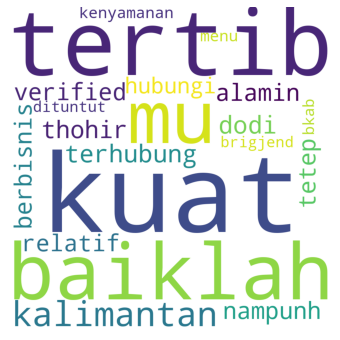

In [16]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wcp = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq_p)
plt.figure(figsize=(9,6))
plt.imshow(wcp)
plt.axis('off')
plt.show()

#### Negative

In [17]:
vec_n = CountVectorizer()
negative_doc = [row['clean_text'] for index,row in data.iterrows() if row['sentiment'] == -1]
text_n = vec_n.fit_transform(negative_doc)
word_count_n = pd.DataFrame(text_n.toarray(), columns=vec_n.get_feature_names())
word_count_n.head(10)

,aaji,abal,accord,ada,adakah,adalah,admin,adminnya,agar,agen,...,wkwkwk,wni,woi,wuiih,ya,yaa,yah,yang,youtube,yuma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
word_list_n = vec_n.get_feature_names()
word_list_n_clean = [w for w in word_list_n if not w in k]
count_list_n = text_n.toarray().sum(axis=0) 
word_freq_n = dict(zip(word_list_n_clean,count_list_n))
sorted(word_freq_n.items(), key=lambda x: x[1], reverse=True)

[('twitter', 207),
 ('disuruh', 194),
 ('pindah', 171),
 ('dikorupsi', 111),
 ('lembaga', 98),
 ('adakah', 80),
 ('mengajukan', 71),
 ('kejujuran', 70),
 ('spert', 70),
 ('amp', 68),
 ('sperti', 68),
 ('jt', 66),
 ('lumajang', 66),
 ('ratusan', 66),
 ('suparta', 66),
 ('kerugian', 62),
 ('babu', 61),
 ('menolak', 60),
 ('kembalikan', 59),
 ('kelamin', 57),
 ('kena', 54),
 ('diisi', 53),
 ('rumit', 51),
 ('ngomong', 49),
 ('siswa', 48),
 ('aparat', 47),
 ('berdasi', 47),
 ('hadir', 47),
 ('sya', 46),
 ('kmi', 45),
 ('diajarkan', 44),
 ('felly', 44),
 ('bengek', 40),
 ('covid', 40),
 ('laundering', 39),
 ('nasabah', 39),
 ('didalamnya', 35),
 ('anjrutttt', 34),
 ('negara', 34),
 ('lakukan', 32),
 ('disampaikan', 30),
 ('percaya', 30),
 ('rekeningnya', 30),
 ('antrian', 28),
 ('awal', 27),
 ('dana', 27),
 ('disekolahin', 27),
 ('mandiri', 27),
 ('paket', 27),
 ('pengembalian', 26),
 ('konfirmasi', 25),
 ('terorganisir', 22),
 ('antri', 21),
 ('kendalanya', 21),
 ('kenyang', 21),
 ('direka

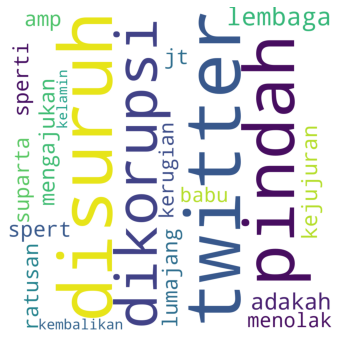

In [19]:
wcn = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(word_freq_n)
plt.figure(figsize=(9,6))
plt.imshow(wcn)
plt.axis('off')
plt.show()

## MEAN Sentiment By Date

<AxesSubplot:xlabel='date'>

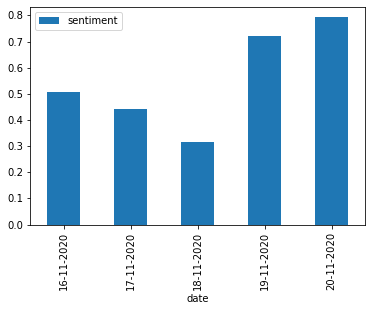

In [20]:
# Mean of the sentiment
df = data['sentiment'].groupby(data['created_at']).mean()
df = df.reset_index()
df.rename(columns={'created_at':'date'}, inplace=True)

# Plotting
fig, ax = plt.subplots()
df.plot.bar(x='date', y='sentiment', ax=ax)

## Stock Data

In [21]:
stock = pd.read_csv('BMRI.JK.csv')
df['stock'] = stock['Close']
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-16,6300.0,6450.0,6150.0,6200.0,6200.0,66958800
1,2020-11-17,6275.0,6375.0,6200.0,6250.0,6250.0,53130800
2,2020-11-18,6150.0,6350.0,6150.0,6350.0,6350.0,62468000
3,2020-11-19,6250.0,6350.0,6200.0,6325.0,6325.0,47404100
4,2020-11-20,6275.0,6350.0,6250.0,6300.0,6300.0,50286800


## Sentiment Tweet vs Stock

In [29]:
df

,date,sentiment,stock
0,16-11-2020,0.506667,6200.0
1,17-11-2020,0.442953,6250.0
2,18-11-2020,0.317568,6350.0
3,19-11-2020,0.720137,6325.0
4,20-11-2020,0.791946,6300.0


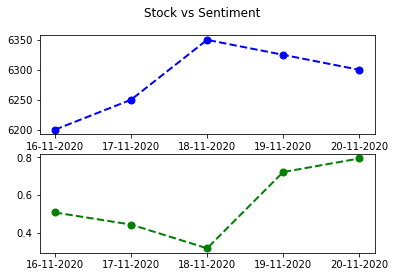

In [34]:
x = df['date']
y = df['sentiment']
z = df['stock']

fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Stock vs Sentiment')
ax1.plot(x, z, 'bo--', linewidth=2, markersize=7)
ax2.plot(x, y, 'go--', linewidth=2, markersize=7)